### Step 1: Import Libraries


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


%matplotlib inline

from matplotlib import pyplot
from pprint import pprint
from IPython.display import display 
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, precision_score
from sklearn.model_selection import RandomizedSearchCV

### Step 2: Data Information

#### 1. Get the dataset information

In [17]:

data_raw = pd.read_csv('BankChurners.csv')

drop_columns = ['CLIENTNUM',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']


data_raw = data_raw.drop(drop_columns,errors='ignore',axis=1)

display(data_raw.info(verbose = True,null_counts=False))
# Check for missing or NaN data 
print("No Missing Data in this Dataset")
print(data_raw.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Attrition_Flag            object 
 1   Customer_Age              int64  
 2   Gender                    object 
 3   Dependent_count           int64  
 4   Education_Level           object 
 5   Marital_Status            object 
 6   Income_Category           object 
 7   Card_Category             object 
 8   Months_on_book            int64  
 9   Total_Relationship_Count  int64  
 10  Months_Inactive_12_mon    int64  
 11  Contacts_Count_12_mon     int64  
 12  Credit_Limit              float64
 13  Total_Revolving_Bal       int64  
 14  Avg_Open_To_Buy           float64
 15  Total_Amt_Chng_Q4_Q1      float64
 16  Total_Trans_Amt           int64  
 17  Total_Trans_Ct            int64  
 18  Total_Ct_Chng_Q4_Q1       float64
 19  Avg_Utilization_Ratio     float64
dtypes: float64(5), int64(9), obj

None

No Missing Data in this Dataset
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


#### This dataset has 10127 customers and 19 features.

#### Good sign: No NaN or missing data

### Step 3: Understand Customer Features

#### 1. Normal vs Churn

In [18]:
counts=data_raw.Attrition_Flag.value_counts()
normal = counts['Existing Customer']
Churn = counts['Attrited Customer']
perc_normal = (normal/(normal+Churn))*100
perc_Churn = (Churn/(normal+Churn))*100
print('There were {} non-Churn ({:.3f}%) and {} Churn ({:.3f}%).'.format(normal, perc_normal, Churn, perc_Churn))



There were 8500 non-Churn (83.934%) and 1627 Churn (16.066%).


#### 2. Distribution of Gender

Text(0.5, 1.0, 'Distribution of Gender')

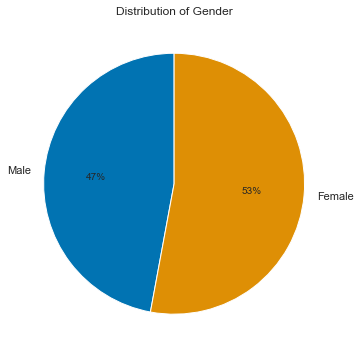

In [33]:
plt.figure(figsize=(12,6))
counts=data_raw.Gender.value_counts()
male=counts['M']
female=counts['F']
pie=[male,female]
mylabel=['Male','Female']
plt.pie(pie,labels=mylabel,startangle=90,autopct='%1.0f%%')
plt.title('Distribution of Gender')


#### 3. Propotion of Education Level

Text(0.5, 1.0, 'Propotion of Education Level')

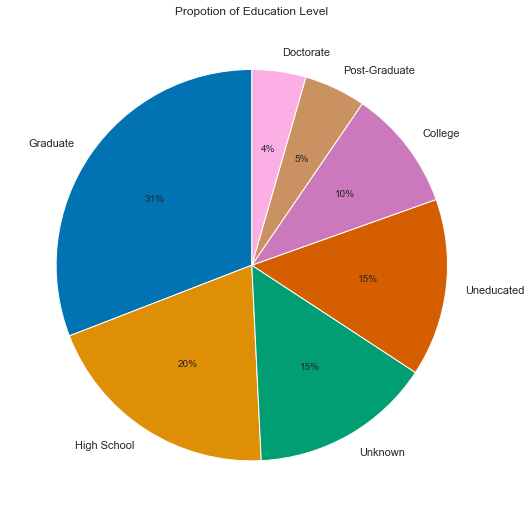

In [36]:
plt.figure(figsize=(18,9))
counts=data_raw.Education_Level.value_counts()

Graduate=counts['Graduate']
High_School=counts['High School']
Unknown=counts['Unknown']
Uneducated=counts['Uneducated']
College=counts['College']
Post_Graduate=counts['Post-Graduate']
Doctorate=counts['Doctorate']
pie=[Graduate, High_School, Unknown, Uneducated, College, Post_Graduate, Doctorate]
mylabel=['Graduate', 'High School', 'Unknown', 'Uneducated', 'College', 'Post-Graduate', 'Doctorate']
plt.pie(pie,labels=mylabel,startangle=90,autopct='%1.0f%%')
plt.title('Propotion of Education Level')


#### 4. Propotion of Marital Status

Text(0.5, 1.0, 'Propotion of Marital Status')

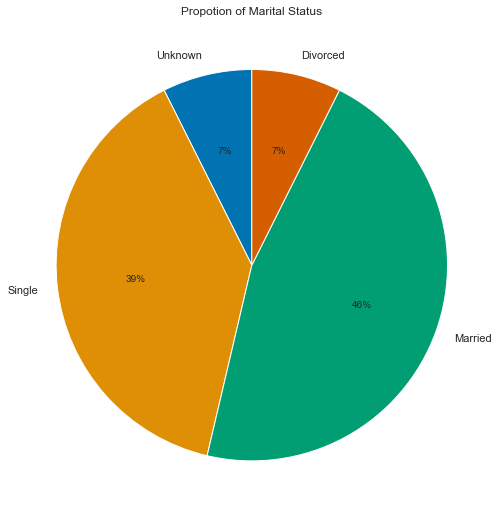

In [37]:
plt.figure(figsize=(18,9))
counts=data_raw.Marital_Status.value_counts()
Unknown=counts['Unknown']
Single=counts['Single']
Married=counts['Married']
Divorced=counts['Divorced']
pie=[Unknown, Single, Married, Divorced]
mylabel=['Unknown', 'Single', 'Married', 'Divorced']
plt.pie(pie,labels=mylabel,startangle=90,autopct='%1.0f%%')
plt.title('Propotion of Marital Status')


#### 5. Porpotion of Different Income Level

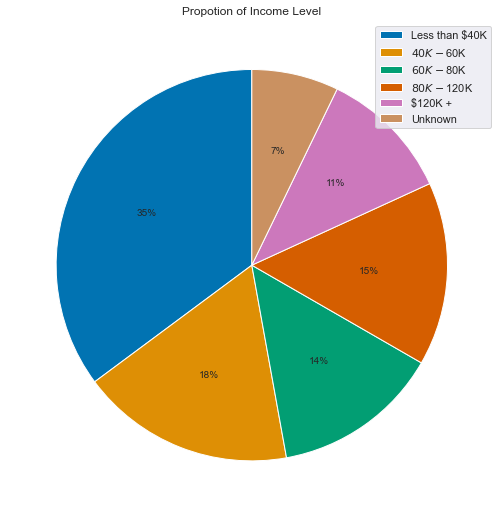

In [38]:
plt.figure(figsize=(18,9))
counts=data_raw.Income_Category.value_counts()
x1=counts['Less than $40K']
x2=counts['$40K - $60K']
x3=counts['$60K - $80K']
x4=counts['$80K - $120K']
x5=counts['Unknown']
x6=counts['$120K +']
pie=[x1,x2,x3,x4,x5,x6]
label=['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +','Unknown']
plt.pie(pie,startangle=90,autopct='%1.0f%%')
plt.title('Propotion of Income Level')
plt.legend(label,loc='upper right')

#### 6. Propotion of Card Category

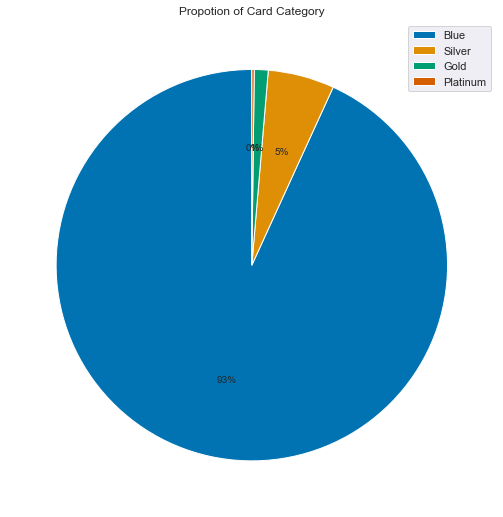

In [39]:
plt.figure(figsize=(18,9))
counts=data_raw.Card_Category.value_counts()
Blue=counts['Blue']
Silver=counts['Silver']
Gold=counts['Gold']
Platinum=counts['Platinum']

pie=[Blue, Silver, Gold, Platinum]
label=['Blue','Silver','Gold','Platinum']
plt.pie(pie,startangle=90,autopct='%1.0f%%')
plt.title('Propotion of Card Category')
plt.legend(label, loc='upper right')

#### 7. Distribution of Other Features


#### *Description of features*
**Months_on_book**(Num): Months on book (Time of Relationship)
<br>**Total_Relationship_Count**(Num): Total no. of products held by the customer
<br>**Months_Inactive_12_mon**(Num): No. of months inactive in the last 12 months
<br>**Contacts_Count_12_mon**(Num): No. of Contacts in the last 12 months
<br>**Credit_Limit**(Num): Credit Limit on the Credit Card
<br>**Total_Revolving_Bal**(Num): Total Revolving Balance on the Credit Card, the portion of credit card spending that goes unpaid at the end of a billing cycle.
<br>**Avg_Open_To_Buy**(Num): Open to Buy Credit Line (Average of last 12 months), the difference between the credit limit assigned to a cardholder account and the present balance on the account.
<br>**Total_Amt_Chng_Q4_Q1**(Num): Change in Transaction Amount (Q4 over Q1) 
<br>**Total_Trans_Amt**(Num): Total Transaction Amount (Last 12 months)
<br>**Total_Trans_Ct**(Num): Total Transaction Count (Last 12 months)
<br>**Total_Ct_Chng_Q4_Q1**(Num): Change in Transaction Count (Q4 over Q1) 
<br>**Avg_Utilization_Ratio**(Num): Average Card Utilization Ratio, how much you currently owe divided by your credit limit.


#### 1) Print the continous features in the dataset 

C:\Users\lesle\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lesle\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lesle\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

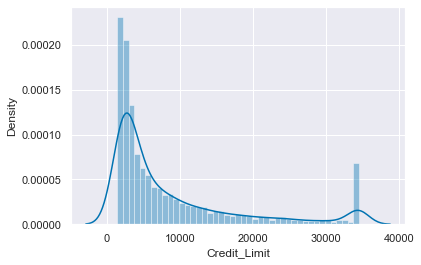

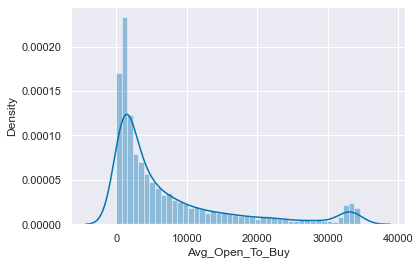

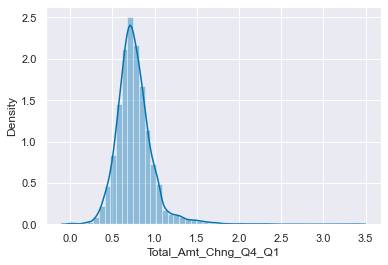

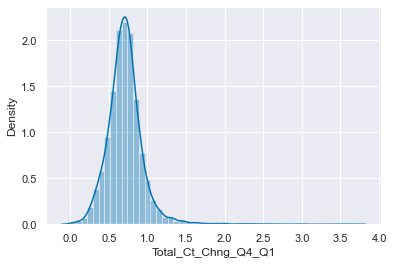

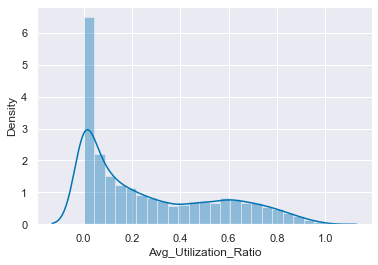

In [46]:

continous_features = data_raw.select_dtypes(['float64']).columns.to_list()

for cont_feature in continous_features: 
    plt.figure()
  
    ax = sns.distplot(data_raw[cont_feature])
    



#### 2) Print the discrete features in the dataset 

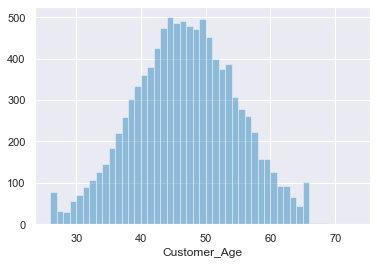

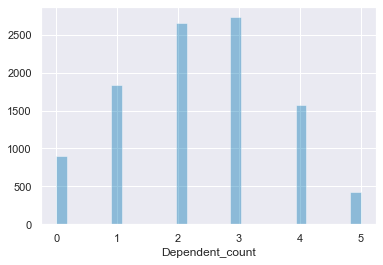

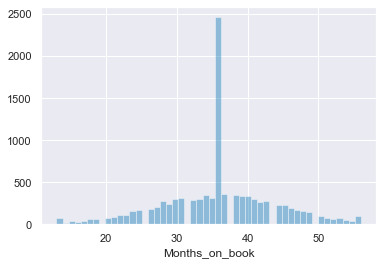

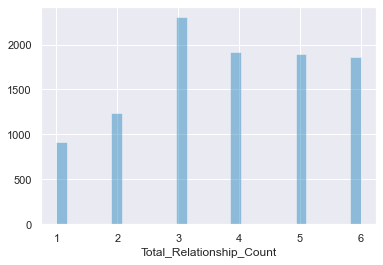

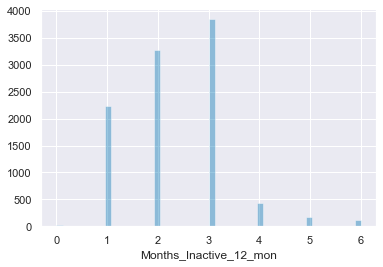

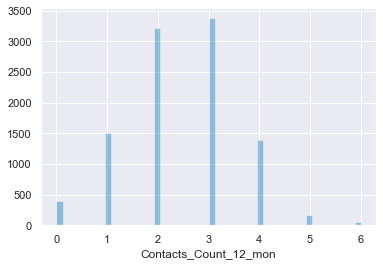

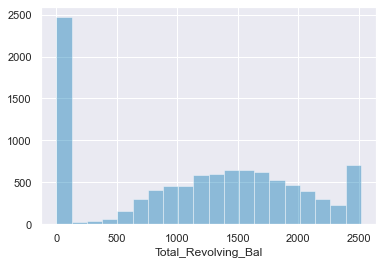

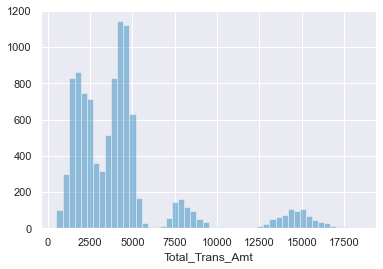

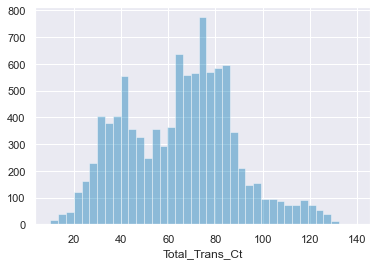

In [45]:

discrete_features = data_raw.select_dtypes(['int64']).columns.to_list()

for disc_feature in discrete_features: 
    plt.figure()

    ax = sns.distplot(data_raw[disc_feature],kde = False)

#### 8. Heatmap

Text(0.5, 1.0, 'Heatmap of all the Features')

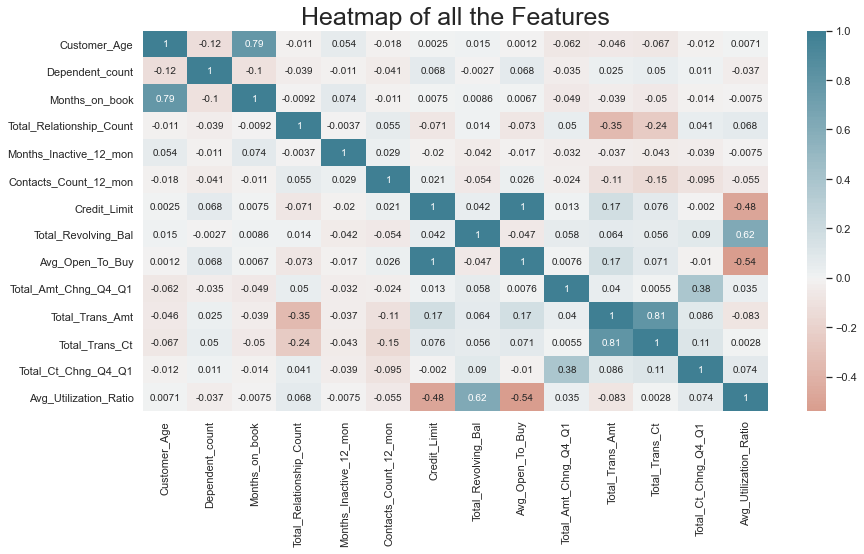

In [51]:

plt.subplots(figsize = (14,7))
sns.heatmap(data_raw.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, center = 0, )
plt.title("Heatmap of all the Features", fontsize = 25)

### Step 4: Data Cleansing

#### 1.Convert columns to appropriate dtypes: bool and object to category

In [20]:
cat_types = ['bool','object','category']
data_clean = data_raw.copy()
data_clean[data_clean.select_dtypes(cat_types).columns] = data_clean.select_dtypes(cat_types).apply(lambda x: x.astype('category'))

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

#### 2.Split data_clean into two datasets: y - depedent variable, x - independent variables 

In [21]:

codes = {'Existing Customer':0, 'Attrited Customer':1}
data_clean['Attrition_Flag'] = data_clean['Attrition_Flag'].map(codes)

y = data_clean['Attrition_Flag']
X = data_clean.drop('Attrition_Flag',errors='ignore',axis=1)

#### 3. Label Encoding

Label Encoding for ordinal variables (ex: rankings, scales, etc) <br>
One Hot Encoding for nominal variables (ex: color, gender, etc.)

In [22]:

for col in X.select_dtypes('category').columns.to_list():
    print(col + ': '+ str(X[col].cat.categories.to_list()))


def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

features_to_encode = X.select_dtypes('category').columns.to_list()
for feature in features_to_encode:
    X = encode_and_bind(X, feature)
    
X.info()

Gender: ['F', 'M']
Education_Level: ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown']
Marital_Status: ['Divorced', 'Married', 'Single', 'Unknown']
Income_Category: ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown']
Card_Category: ['Blue', 'Gold', 'Platinum', 'Silver']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    10127 non-null  int64  
 1   Dependent_count                 10127 non-null  int64  
 2   Months_on_book                  10127 non-null  int64  
 3   Total_Relationship_Count        10127 non-null  int64  
 4   Months_Inactive_12_mon          10127 non-null  int64  
 5   Contacts_Count_12_mon           10127 non-null  int64  
 6   Credit_Limit                    10127 non-null  f

### Step 5: Prediction

#### 1. Data Processing

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


%matplotlib inline

from matplotlib import pyplot
from pprint import pprint
from IPython.display import display 
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, precision_score
from sklearn.model_selection import RandomizedSearchCV

In [7]:
data_raw = pd.read_csv('BankChurners.csv')

drop_columns = ['CLIENTNUM',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']


data_raw = data_raw.drop(drop_columns,errors='ignore',axis=1)

cat_types = ['bool','object','category']
data_clean = data_raw.copy()
data_clean[data_clean.select_dtypes(cat_types).columns] = data_clean.select_dtypes(cat_types).apply(lambda x: x.astype('category'))
data_clean.info()

from sklearn.model_selection import train_test_split
X=data_clean.drop("Attrition_Flag",axis=1)
y=data_clean.Attrition_Flag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

(7088, 19)

In [9]:
X_train_num=X_train[X_train.select_dtypes(['int64',"float64"]).columns]
X_test_num=X_test[X_test.select_dtypes(['int64',"float64"]).columns]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_num)
X_train_scaled=pd.DataFrame(scaler.transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)
X_test_scaled=pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)
X_train_dum=pd.get_dummies(X_train[X_train.select_dtypes(['category']).columns],drop_first=True)
X_test_dum=pd.get_dummies(X_test[X_test.select_dtypes(['category']).columns],drop_first=True)
X_train_pd=pd.concat([X_train_scaled, X_train_dum], axis=1)
X_test_pd=pd.concat([X_test_scaled, X_test_dum], axis=1)


#### 2. Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train_pd,y_train)
lrpredictions = logmodel.predict(X_test_pd)
from sklearn.metrics import classification_report
print(classification_report(y_test,lrpredictions))

                   precision    recall  f1-score   support

Attrited Customer       0.79      0.50      0.61       496
Existing Customer       0.91      0.97      0.94      2543

         accuracy                           0.90      3039
        macro avg       0.85      0.74      0.77      3039
     weighted avg       0.89      0.90      0.89      3039



For logistic regression, the accuracy is 90% and recall is 50%.

#### 3. Decision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(random_state=0)
dtmodel.fit(X_train_pd,y_train)
dtpredictions=dtmodel.predict(X_test_pd)
print(classification_report(y_test,dtpredictions))

                   precision    recall  f1-score   support

Attrited Customer       0.80      0.78      0.79       496
Existing Customer       0.96      0.96      0.96      2543

         accuracy                           0.93      3039
        macro avg       0.88      0.87      0.88      3039
     weighted avg       0.93      0.93      0.93      3039



Both accuracy (93% vs 90%) and recall (78% vs 50%) are improved compared with results in logistic regression.

#### 4. Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(random_state=0,max_depth=100,n_estimators=50)
rfmodel.fit(X_train_pd,y_train)
rfpredictions=rfmodel.predict(X_test_pd)
print(classification_report(y_test,rfpredictions))

                   precision    recall  f1-score   support

Attrited Customer       0.92      0.77      0.84       496
Existing Customer       0.96      0.99      0.97      2543

         accuracy                           0.95      3039
        macro avg       0.94      0.88      0.91      3039
     weighted avg       0.95      0.95      0.95      3039



The accuracy is improved from 93% to 95%, but the recall drops slightly to 77%. Since recall is a more important factor, Decision Tree Classifier might fit this prediction better.

### Step 6. Insights

#### 1. Customer Profiles

In [24]:

Attrited = data_raw[data_raw['Attrition_Flag'] == "Attrited Customer"]
Existing = data_raw[data_raw['Attrition_Flag'] == "Existing Customer"]

Attrited.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.627000e+03,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,7.352614e+08,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475,0.994909,0.005091
std,3.557725e+07,7.665652,1.275010,7.796548,1.577782,0.899623,1.090537,9095.334105,921.385582,9109.208129,0.214924,2308.227629,14.568429,0.226854,0.264458,0.004303,0.004303
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.945910,0.000420
25%,7.123713e+08,41.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2114.000000,0.000000,1587.000000,0.544500,1903.500000,37.000000,0.400000,0.000000,0.994300,0.002825
50%,7.165644e+08,47.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4178.000000,0.000000,3488.000000,0.701000,2329.000000,43.000000,0.531000,0.000000,0.996310,0.003688
75%,7.683737e+08,52.000000,3.000000,40.000000,5.000000,3.000000,4.000000,9933.500000,1303.500000,9257.500000,0.856000,2772.000000,51.000000,0.692000,0.231000,0.997170,0.005700
max,8.282949e+08,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.492000,10583.000000,94.000000,2.500000,0.999000,0.999580,0.054090


In [25]:
Existing.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,8.500000e+03,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,7.399272e+08,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412,0.000186,0.999814
std,3.710723e+07,8.081157,1.303229,8.021810,1.528949,1.016741,1.081436,9084.969807,757.745354,9087.671862,0.217783,3512.772635,22.919011,0.228054,0.272568,0.000140,0.000141
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,15.000000,0.256000,816.000000,11.000000,0.028000,0.000000,0.000008,0.998680
25%,7.132197e+08,41.000000,1.000000,31.000000,3.000000,1.000000,2.000000,2602.000000,800.000000,1184.500000,0.643000,2384.750000,54.000000,0.617000,0.055000,0.000090,0.999760
50%,7.181643e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4643.500000,1364.000000,3469.500000,0.743000,4100.000000,71.000000,0.721000,0.211000,0.000158,0.999840
75%,7.783415e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11252.750000,1807.000000,9978.250000,0.860000,4781.250000,82.000000,0.833000,0.529250,0.000244,0.999910
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,5.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.994000,0.001317,0.999990


#### 2. Overall Distribution

<ul>
    <li>There were 8500 non-Churn (83.934%) and 1627 Churn (16.066%). </li>
    <li>More females than males are in our dataset, however the difference is not significant.(53% vs 47%) </li>
    <li>If most of the customers with unknown education status lack any education, we can say that 70% of the customers have a formal degree and about 40% have a higher level of education.</li>
    <li>Almost half of our customers are married (46%) and almost the entire other half are single (39%). </li>
    <li>About two thirds customers have the income below $80K. </li>
    <li>93% customers hold Blue card.</li>
    <li> Age is normally distributed, so is Dependant_count, Month_on_Book and Contact_count.
    
    

#### 3. Dive into Existing and Attrited Customers

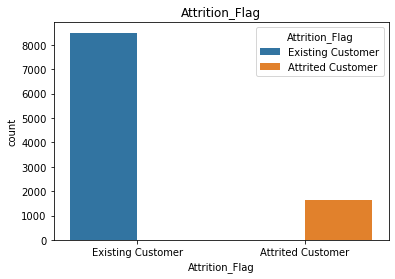

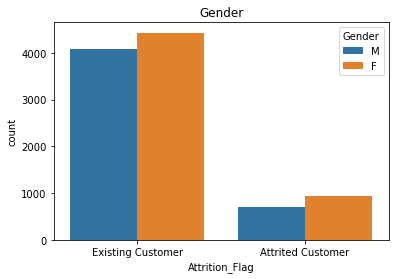

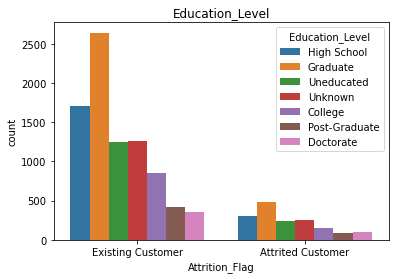

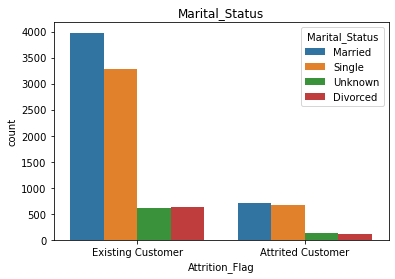

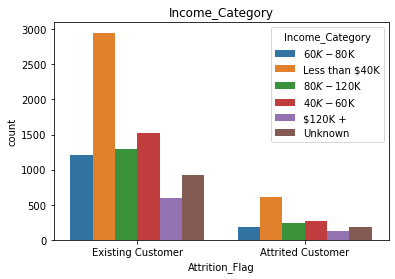

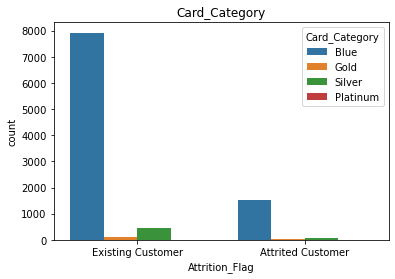

In [33]:
cat_feature = data_raw.select_dtypes(['object']).columns.to_list()

for cat in cat_feature: 
    sns.countplot(x='Attrition_Flag', data=data_raw, hue= cat)
    plt.title(cat)
    plt.show()
  
 

 <li> Features for Gender, Education Level, Marriage Status, Card Category for churned/non-churned customers show similar distribution and no clear shift can be noticed.
 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


%matplotlib inline

from matplotlib import pyplot
from pprint import pprint
from IPython.display import display 
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, precision_score
from sklearn.model_selection import RandomizedSearchCV

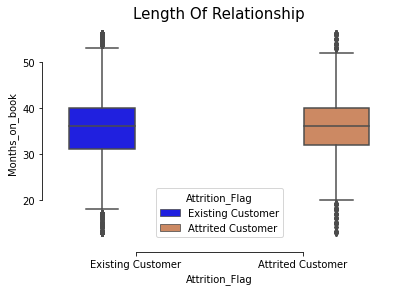

In [7]:
data_raw=pd.read_csv('BankChurners.csv')
sns.boxplot(x="Attrition_Flag", y="Months_on_book",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data_raw).set_title("Length Of Relationship", fontsize=15)
sns.despine(offset=10, trim=True)

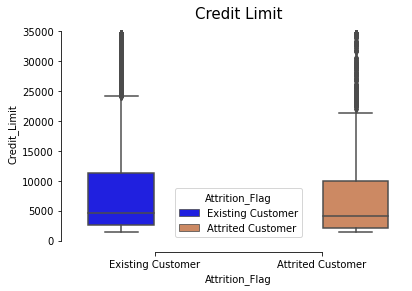

In [14]:
sns.boxplot(x="Attrition_Flag", y="Credit_Limit",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data_raw).set_title("Credit Limit", fontsize=15)
sns.despine(offset=10, trim=True)

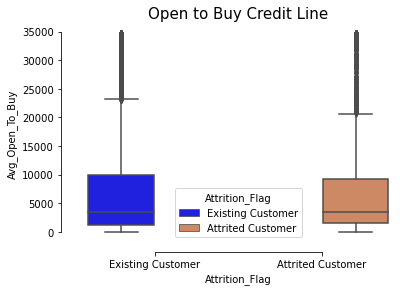

In [17]:
sns.boxplot(x="Attrition_Flag", y="Avg_Open_To_Buy",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data_raw).set_title("Open to Buy Credit Line", fontsize=15)
sns.despine(offset=10, trim=True)

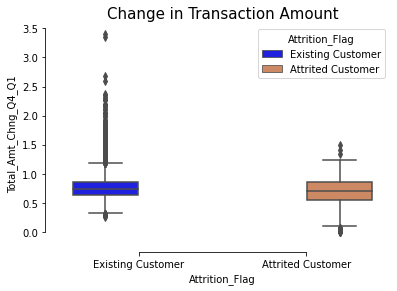

In [18]:
sns.boxplot(x="Attrition_Flag", y="Total_Amt_Chng_Q4_Q1",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data_raw).set_title("Change in Transaction Amount", fontsize=15)
sns.despine(offset=10, trim=True)

<li> No clear shift for Months_on_Book, Credit limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1.

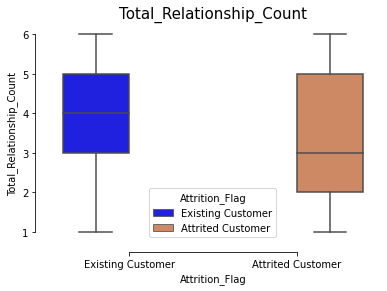

In [8]:
sns.boxplot(x="Attrition_Flag", y="Total_Relationship_Count",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data_raw).set_title("Total_Relationship_Count", fontsize=15)
sns.despine(offset=10, trim=True)

<li> The existing customers tend to buy more products than the attrited customers.

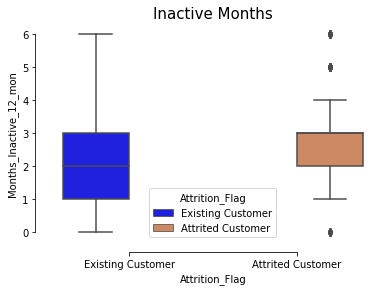

In [11]:
sns.boxplot(x="Attrition_Flag", y="Months_Inactive_12_mon",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data_raw).set_title("Inactive Months", fontsize=15)
sns.despine(offset=10, trim=True)

<li>  Most of the customers show a 3 month inactivity, meanwhile most of the active members (less then 3 months) can be found within the existing customers.

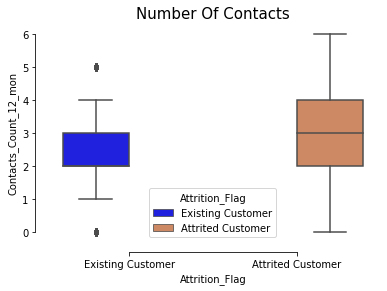

In [13]:
sns.boxplot(x="Attrition_Flag", y="Contacts_Count_12_mon",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data_raw).set_title("Number Of Contacts", fontsize=15)
sns.despine(offset=10, trim=True)

<li> Attrited customers are most likely to have more contact than the existing customers.

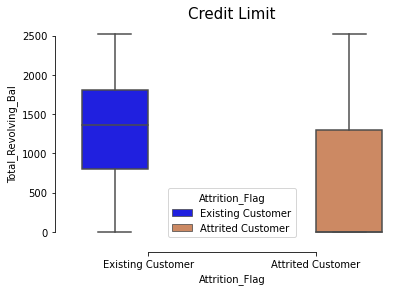

In [15]:
sns.boxplot(x="Attrition_Flag", y="Total_Revolving_Bal",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data_raw).set_title("Credit Limit", fontsize=15)
sns.despine(offset=10, trim=True)

<li> Attrited customers have a lower revolving balance than the existing customers.

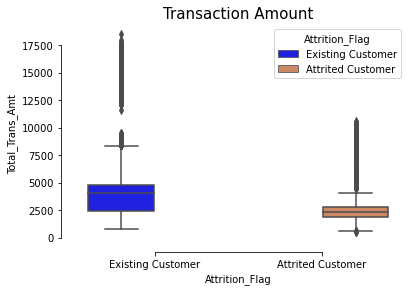

In [19]:
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Amt",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data_raw).set_title("Transaction Amount", fontsize=15)
sns.despine(offset=10, trim=True)

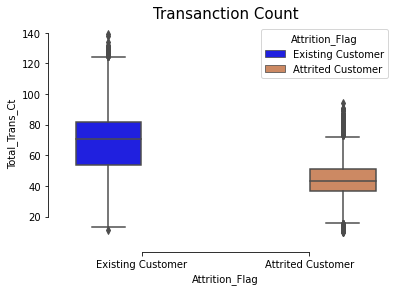

In [20]:
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Ct",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data_raw).set_title("Transanction Count", fontsize=15)
sns.despine(offset=10, trim=True)

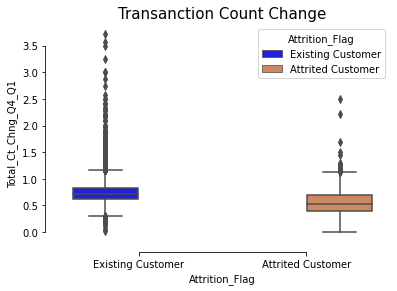

In [21]:
sns.boxplot(x="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data_raw).set_title("Transanction Count Change", fontsize=15)
sns.despine(offset=10, trim=True)

<li>Both transaction amount and transaction count are lower for the attrited customers compared to the existing customers. In addition, the average transaction count change is higher for the existing customers.

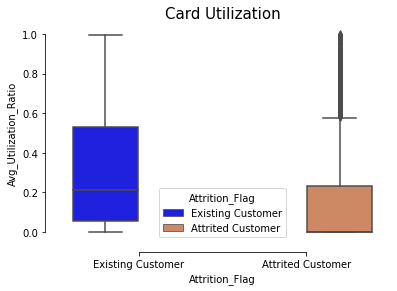

In [23]:
sns.boxplot(x="Attrition_Flag", y="Avg_Utilization_Ratio",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data_raw).set_title("Card Utilization", fontsize=15)
sns.despine(offset=10, trim=True)

<li> Average card utilization ratio is higher for the existing customers.

#### 4. Important Features for Decision Tree Classifier

The insights above align with the important features for the prediction model.

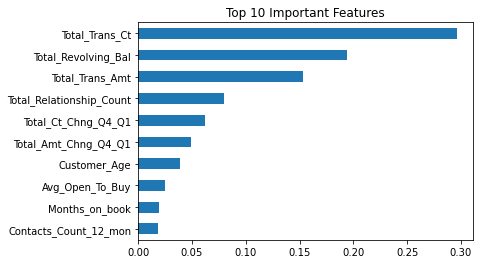

In [16]:
feat_importances = pd.Series(dtmodel.feature_importances_, index=X_train_pd.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()